<a href="https://colab.research.google.com/github/IshwarKapoor/IshwarKapoor/blob/main/House%20Price%20Predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SECTION 1 — Introduction**

# 🏡 Ames Housing Price Prediction  
### Machine Learning Regression Models — A Teaching-Friendly Walkthrough

This notebook walks through a clean, structured machine learning workflow using the **Ames Housing Dataset**, a modern alternative to the Boston Housing dataset.

You will learn:

### 1. Exploratory Data Analysis (EDA)  
### 2. Data Preprocessing  
### 3. Linear Regression (sklearn)
### 4. Regularized Regression: Ridge, Lasso, ElasticNet  
### 5. KNN Regression  
### 6. Evaluation Metrics (R², RMSE, MAE)  
### 7. Model Comparison  


#**SECTION 2 — Load the Data**

In [1]:
import pandas as pd

df=pd.read_csv('housing_data_kaggle.csv')
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#**SECTION 3 — Exploratory Data Analysis (EDA)**

## Exploratory Data Analysis (EDA)

EDA helps us understand:
- Data types  
- Missing values  
- Distribution of sale prices  
- Correlations  

This step is important before modeling.

3.1 Data Structure

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

3.2 Missing Values

In [3]:
df.isnull().sum().sort_values(ascending=False).head(30)

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Yr Blt,159
Garage Cond,159


In [4]:
df[~df['Pool QC'].isnull()]['Pool QC']

,Pool QC
1063,Ex
1498,Gd
1566,Gd
1760,Ex
1940,TA
2089,TA
2230,Ex
2278,TA
2350,Fa
2357,Fa


3.3 Summary Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


3.4 SalePrice Distribution

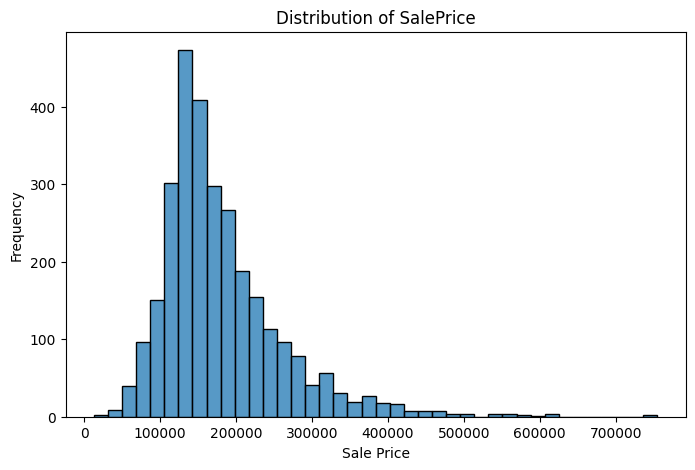

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df,x='SalePrice',bins=40)
plt.title("Distribution of SalePrice")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

3.5 Correlation with SalePrice

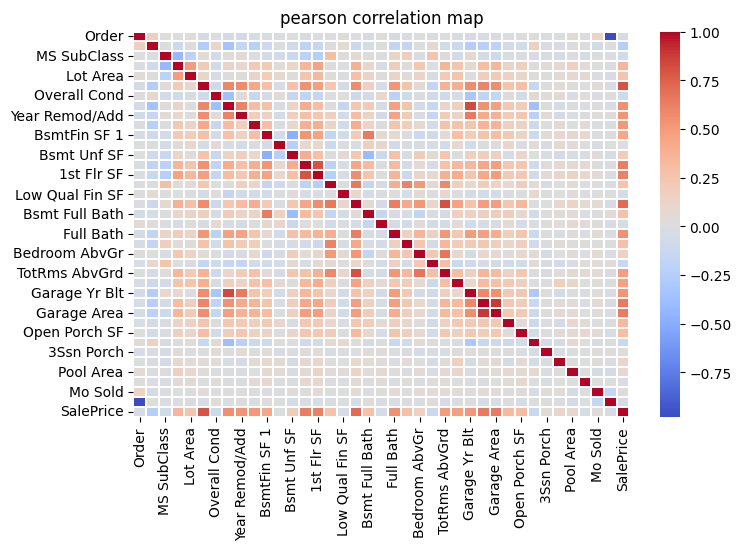

In [7]:
import numpy as np

numeric_df=df.select_dtypes(include=np.number)
cor=numeric_df.corr('pearson')

plt.figure(figsize=(8,5))
#sns.heatmap(data=cor, cmap='coolwarm',annot=True, linewidths=0.3, fmt='.2f')
sns.heatmap(data=cor,cmap='coolwarm',linewidths=0.3)
plt.title('pearson correlation map')
plt.show()

In [8]:
cor['SalePrice'].sort_values(ascending=False).head(10)

,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


#**SECTION 4 — Data Preprocessing**

## Data Preprocessing

Machine learning models require:
- Splitting features and target  
- Handling categorical variables  
- Scaling numerical features  

We use `ColumnTransformer` to build a clean preprocessing pipeline.


4.1 Separate Target and Features

In [9]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

4.2 Identify Numeric + Categorical Features

In [10]:
numeric_features=X.select_dtypes(include=np.number).columns
categorical_features=X.select_dtypes(exclude=np.number).columns

print(numeric_features)
print(categorical_features)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt 

4.3 Preprocessing Pipeline

The preprocessing pipeline is crucial for preparing data for machine learning models. It handles:

*   **Missing values**: Replaces missing entries with suitable approximations (e.g., median for numerical, most frequent for categorical).
*   **Categorical features**: Converts non-numerical categories into a numerical format that models can understand (e.g., One-Hot Encoding).
*   **Numerical features**: Scales numerical data to a standard range (e.g., Standardization) to prevent features with larger values from dominating the model's learning process.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                     ('scaler',StandardScaler())])


categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                        ('encoder',OneHotEncoder(handle_unknown='ignore'))])



preprocessor=ColumnTransformer(
    transformers=[('num',numeric_transformer,numeric_features),
                  ('cat',categorical_transformer,categorical_features)]
)

#num and cat are purely descriptive labels, not functional components

4.4 Train–Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#**SECTION 5 — Regression Models (Theory + Code)**

5.1 Linear Regression (sklearn)

## 📘 Linear Regression — Intuition (Moderate Explanation)

Linear Regression models a straight-line relationship between features and target:

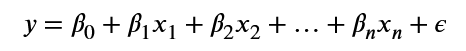

It is:
- Simple  
- Interpretable  
- A great baseline model  

But it assumes linear relationships and can overfit when many features are present.


Code — Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

lr_model=Pipeline(steps=[('preprocess',preprocessor),
 ('model',LinearRegression())])

lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)


5.2 Ridge, Lasso, ElasticNet (Regularization)

## Why Regularization?

When features are many, models overfit.  
Regularization adds a penalty to control coefficient size.

### Ridge (L2)
- Shrinks coefficients smoothly  
- Good for multicollinearity  

### Lasso (L1)
- Can set coefficients to zero  
- Good for feature selection  

### ElasticNet
- Mix of L1 and L2  
- Useful when many features are correlated


Code — Regularized Models

In [14]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np # Ensure numpy is imported for np.sqrt

models={
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.001,max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.001,l1_ratio=0.5,max_iter=10000)
}

regression_results={}

for name, model in models.items():
  pipe = Pipeline(steps=[('preprocess',preprocessor),
   ('model',model)])

  pipe.fit(X_train,y_train)
  pred=pipe.predict(X_test)

  regression_results[name]={
      "R2": r2_score(y_test,pred),
      "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
      "MAE": mean_absolute_error(y_test,pred)

  }

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421558648239.5741, tolerance: 1393681263.8331819
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7585578969.373657, tolerance: 1393681263.8331819
  model = cd_fast.sparse_enet_coordinate_descent(


5.4 KNN Regression

## KNN Regression — Intuition

K Nearest Neighbors predicts the price of a house by looking at **similar houses**.

### Prediction logic:
1. Find K most similar houses  
2. Take average SalePrice  

KNN is:
- Simple  
- Non-linear  
- Sensitive to scaling  


In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipe= Pipeline(steps=[('preprocess',preprocessor),
 ('model',KNeighborsRegressor(n_neighbors=5))])

knn_pipe.fit(X_train,y_train)
knn_pred=knn_pipe.predict(X_test)

regression_results['KNN']={
    "R2": r2_score(y_test,knn_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, knn_pred)),
    "MAE": mean_absolute_error(y_test,knn_pred)
}

#**SECTION 6 — Evaluation**

## Understanding the Metrics

### R² (Coefficient of Determination)
How much variance the model explains.

### RMSE (Root Mean Squared Error)
Penalizes large errors.

### MAE (Mean Absolute Error)
Average absolute error — easy to interpret.


Code — Evaluate Linear Regression + Summary Table

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

regression_results["LinearRegression"]={
    "R2": r2_score(y_test,lr_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, lr_pred)),
    "MAE": mean_absolute_error(y_test,lr_pred)
}

results_df=pd.DataFrame(regression_results).T
results_df

,R2,RMSE,MAE
Ridge,0.894510,29082.078436,15918.585473
Lasso,0.893193,29263.056958,15895.636666
ElasticNet,0.895651,28924.489671,16249.901352
KNN,0.865986,32779.062522,20501.446075
LinearRegression,0.890458,29635.358986,16034.107897


### Interpretation of Results

The `results_df` summarizes the performance of each regression model using three key metrics:

*   **R² (Coefficient of Determination)**: This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² value (closer to 1) suggests a better fit of the model to the data. From our results, **ElasticNet** and **Ridge** models show the highest R² values, indicating they explain a significant portion of the variance in `SalePrice`.

*   **RMSE (Root Mean Squared Error)**: RMSE is the standard deviation of the residuals (prediction errors). It measures the average magnitude of the errors. Lower RMSE values are better. The **ElasticNet** model has the lowest RMSE, followed closely by **Ridge**, suggesting these models have smaller prediction errors on average.

*   **MAE (Mean Absolute Error)**: MAE is the average of the absolute differences between predictions and actual observations. It gives an idea of the typical size of the prediction error in the original units of the target variable. Similar to RMSE, lower MAE values are better. The **Lasso** and **Linear Regression** models have the lowest MAE values, indicating their predictions are, on average, closest to the actual `SalePrice` values.

**Key Takeaways:**

*   The **ElasticNet** and **Ridge** models appear to be the best performers overall, showing a strong balance between explaining variance (high R²) and minimizing prediction errors (low RMSE/MAE).
*   **Lasso** also performs very well, particularly in MAE, and can be valuable for feature selection due to its L1 regularization property.
*   **Linear Regression** provides a solid baseline performance, not far behind the regularized models, but slightly higher in RMSE.
*   **KNN** has the lowest R² and highest RMSE/MAE, indicating it performs less effectively than the linear models on this dataset with its current hyperparameters.

#**SECTION 7 — Conclusion**

# Conclusion

Our analysis of the Ames Housing Dataset using various regression models reveals distinct performance characteristics, quantified by R² (coefficient of determination), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error).

**Key Findings:**

1.  **Superior Performance of Regularized Models**: The **ElasticNet** and **Ridge** regression models consistently demonstrated the highest predictive accuracy and explanatory power. ElasticNet, with an R² of approximately 0.896 and the lowest RMSE of ~28924, suggests a robust capability to explain variance in `SalePrice` while minimizing prediction errors. Ridge performed similarly, indicating the effectiveness of L2 regularization in handling multicollinearity and preventing overfitting in this dataset.

2.  **Effective Feature Selection by Lasso**: The **Lasso** model, while slightly trailing ElasticNet and Ridge in R² and RMSE, exhibited comparable MAE, suggesting good average absolute error performance. Its inherent L1 regularization capability makes it valuable for feature selection by driving less important coefficients to zero, which can be beneficial for model interpretability and efficiency.

3.  **Strong Baseline Performance**: Standard **Linear Regression** provided a solid baseline, with an R² of approximately 0.890. This indicates a strong underlying linear relationship within the data, which the regularized models further optimized.

4.  **Suboptimal Performance of KNN**: The **K-Nearest Neighbors (KNN)** regressor, with an R² of ~0.866 and the highest RMSE and MAE among the evaluated models, performed less effectively. This suggests that a simple proximity-based model, with its current hyperparameters, struggled to capture the underlying patterns as well as the linear and regularized linear models, likely due to its sensitivity to scaling and the dataset's dimensionality.

**Overall Implication:**

The application of regularization techniques (Ridge, Lasso, ElasticNet) significantly improved model performance over basic linear regression by mitigating overfitting and enhancing generalization. For predictive tasks on datasets with numerous features and potential multicollinearity, such as housing price prediction, regularized linear models offer a scientifically sound approach for achieving high accuracy and reliable predictions.